In [50]:
import numpy as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
df = pd.read_csv('AirlinePassengerSatisfaction-test.csv')
# df = sns.load_dataset('AirlinePassengerSatisfaction-test')

In [75]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [54]:
X = df[['Age','Flight Distance','Inflight wifi service']]
Y = df['Gender']

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# K-Nearest Neighbor

In [56]:
modelKNN = KNeighborsClassifier(n_neighbors = 5)

In [57]:
modelKNN.fit(X_train, Y_train)

KNeighborsClassifier()

# Akurasi Training Set Menggunakan KNN

In [58]:
modelKNN.score(X_train, Y_train)

0.687487969201155

# Akurasi Testing Set Menggunakan KNN

In [59]:
modelKNN.score(X_test, Y_test)

0.49210931485758275

In [60]:
prediction = [[40, 2000, 1]]
modelKNN.predict(prediction)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Female'], dtype=object)

# SVM

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [62]:
svc = SVC().fit(X_train, Y_train)
svc_predict = svc.predict(X_test)

In [63]:
accuracy_score(Y_test, svc_predict)

0.5026943802925328

# Visualisasi Confusion Matrix KNN

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [65]:
cm_predict = modelKNN.predict(X_test)

In [66]:
cm = confusion_matrix(Y_test, cm_predict)
cm

array([[1356, 1256],
       [1383, 1201]], dtype=int64)

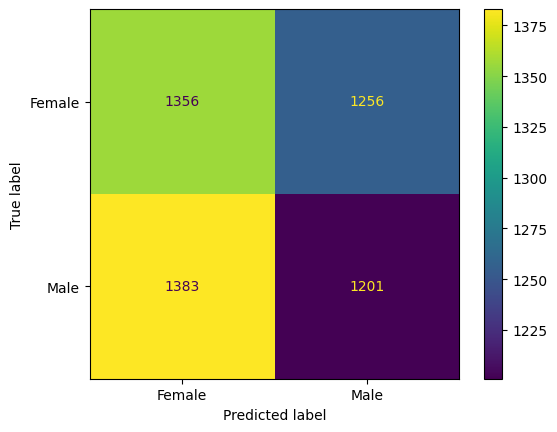

In [67]:
disp_cm = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = modelKNN.classes_
)
disp_cm.plot()
plt.grid(False)
plt.show()

# Visualisasi Regression KNN

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [69]:
x = df[['Flight Distance']] # PREDICTOR
y = df[['Departure Delay in Minutes']] # TARGET

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [71]:
modelLR = LinearRegression().fit(x_train, y_train)
LR_predict = modelLR.predict(x_test)

In [72]:
mse = mean_squared_error(y_test, LR_predict)
rmse = mean_squared_error(y_test, LR_predict, squared=False)
r_2 = modelLR.score(x_test, y_test)
mae = mean_absolute_error(y_test, LR_predict)

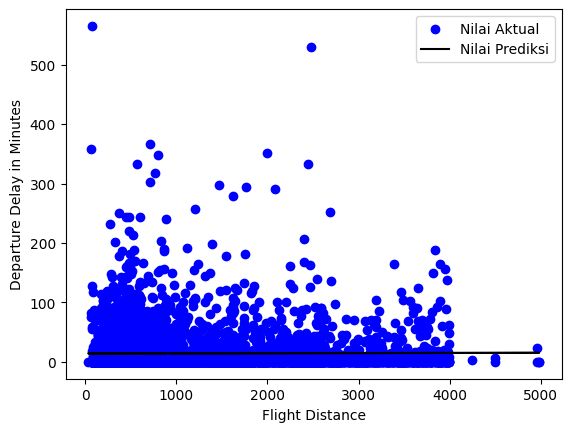

In [76]:
plt.scatter(x_test, y_test, color="blue", label="Nilai Aktual")
plt.plot(x_test, LR_predict, color="black", label="Nilai Prediksi")
plt.xlabel("Flight Distance")
plt.ylabel("Departure Delay in Minutes")
plt.legend()
plt.show()